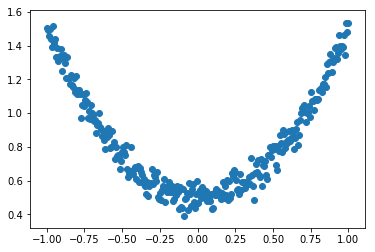

InvalidArgumentError: You must feed a value for placeholder tensor 'inputs/y_input' with dtype float and shape [?,1]
	 [[Node: inputs/y_input = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'inputs/y_input', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-e959df92d477>", line 27, in <module>
    ys = tf.placeholder(tf.float32, [None, 1], name = 'y_input')
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'inputs/y_input' with dtype float and shape [?,1]
	 [[Node: inputs/y_input = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, n_layer, activation_function = None):
# add one more layer and return the output of this layer
  layer_name = 'layer%s' % n_layer
  with tf.name_scope('layer'):
    with tf.name_scope('weights'):
      Weights = tf.Variable(tf.random_normal([in_size, out_size]), name = 'W')
      tf.summary.histogram(layer_name + '/weights', Weights)
    with tf.name_scope('biases'):
      biases = tf.Variable(tf.zeros([1,out_size]) + 0.1, name = 'b')
      tf.summary.histogram(layer_name + '/biases', biases)
    with tf.name_scope('Wx_plus_b'):
      Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases, name = 'Wpb')
    if activation_function is None:
      outputs = Wx_plus_b
    else:
      outputs = activation_function(Wx_plus_b)
    tf.summary.histogram(layer_name + '/outputs', outputs)
  return outputs

#define placeholder for inputs
with tf.name_scope('inputs'):
  xs = tf.placeholder(tf.float32, [None, 1], name = 'x_input')
  ys = tf.placeholder(tf.float32, [None, 1], name = 'y_input')

# make up some real data
x_data = np.linspace(-1.0, 1.0, 300, dtype = np.float32)[:,np.newaxis]
noise = np.random.normal(0.0, 0.05, x_data.shape)
y_data = np.square(x_data) + 0.5 + noise

# add hidden layer and output layer
l1 = add_layer(xs, 1, 10, n_layer = 1, activation_function = tf.nn.relu)
prediction = add_layer(l1, 10, 1, n_layer = 2, activation_function = None)

# the error between prediction and real data
with tf.name_scope('loss'):
  loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices = [1]), name = 'L')
  tf.summary.scalar('loss', loss)
with tf.name_scope('train'):
  train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()
with tf.Session() as sess:
  sess.run(init)
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  ax.scatter(x_data, y_data)
  plt.show(block = False)
  merged =tf.summary.merge_all()
  writer = tf.summary.FileWriter('/tmp/tensorlogs/ex5', sess.graph)
  for i in range(1000):
    sess.run(train_step, feed_dict = {xs : x_data, ys : y_data})
    if i % 50 == 0:
# print(i, sess.run(loss, feed_dict = {xs : x_data, ys : y_data}))
       try:
          ax.lines.remove(lines[0])
       except Exception:
          pass
    result, prediction_value = sess.run([merged, prediction], feed_dict = {xs : x_data, ys : y_data})
    lines = ax.plot(x_data, prediction_value, 'r-', lw = 5)
    plt.pause(0.1)
    writer.add_summary(result, i)
